In [1]:
from collections import Counter, defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from controller import deserializeFileToObject, writeOutputsForDatasets, getAllDatasets

In [2]:
dataset_tables = deserializeFileToObject()

In [3]:
def addTaxes(dataset_tables):
    for dataset, tables in dataset_tables.items():
        table1, table2, table3 = tables
        table1.loc['samp tax1'] = table1.loc['all'] - table1.loc['sway1']
        table1.loc['xpln tax1'] = table1.loc['sway1'] - table1.loc['xpln1']
        table1.loc['samp tax2'] = table1.loc['all'] - table1.loc['sway2']
        table1.loc['xpln tax2'] = table1.loc['sway2'] - table1.loc['xpln2']
        table1.loc['samp tax3'] = table1.loc['all'] - table1.loc['sway3']
        table1.loc['xpln tax3'] = table1.loc['sway3'] - table1.loc['xpln3']
    
    return dataset_tables

dataset_tables_with_taxes = addTaxes(dataset_tables)
writeOutputsForDatasets(dataset_tables_with_taxes, terminal_output=False)

In [4]:
def getDatasetScores(dataset_tables):
    scores = defaultdict(dict)
    for dataset, tables in dataset_tables.items():
        table1, table2, table3 = tables
        columns = list(table2.columns)
        equal2, better2, worse2 = 0,0,0
        equal3, better3, worse3 = 0,0,0
        for col in columns:
            multiplier = 1 if col[-1]=='+' else -1
            # for sway2
            if table2.loc['sway1 to sway2',col] == '=':
                equal2+=1
            else:
                sway1_val = multiplier*table1.loc['sway1',col]
                sway2_val = multiplier*table1.loc['sway2',col]
                if sway2_val > sway1_val:
                    better2 += 1
                else:
                    worse2 += 1
            # for sway3
            if table2.loc['sway1 to sway3',col] == '=':
                equal3+=1
            else:
                sway1_val = multiplier*table1.loc['sway1',col]
                sway3_val = multiplier*table1.loc['sway2',col]
                if sway3_val > sway1_val:
                    better3 += 1
                else:
                    worse3 += 1
        # scores[dataset]['sway2'] = [equal2, better2, worse2]
        # scores[dataset]['sway3'] = [equal3, better3, worse3]
        scores[dataset]['sway2 to sway1'] = '-' if (better2+worse2)==0 else(better2)/(better2+worse2)
        scores[dataset]['sway3 to sway1'] = '-' if (better3+worse3)==0 else (better3)/(better3+worse3)
    
    return pd.DataFrame.from_dict(scores).T

getDatasetScores(dataset_tables)


,sway2 to sway1,sway3 to sway1
SSM.csv,-,-
SSN.csv,-,0.0
auto2.csv,-,-
auto93.csv,-,-
china.csv,-,-
coc1000.csv,-,1.0
coc10000.csv,0.5,1.0
healthCloseIsses12mths0001-hard.csv,0.333333,-
healthCloseIsses12mths0011-easy.csv,-,0.5
nasa93dem.csv,-,-


In [5]:
def getOutputColumns(df:pd.DataFrame):
    out_cols = []
    for col in df.columns:
        if col[-1] in ('-','+'):
            out_cols.append(col)
    return out_cols


## Get Correlation Plots for worst performing and best performing datasets

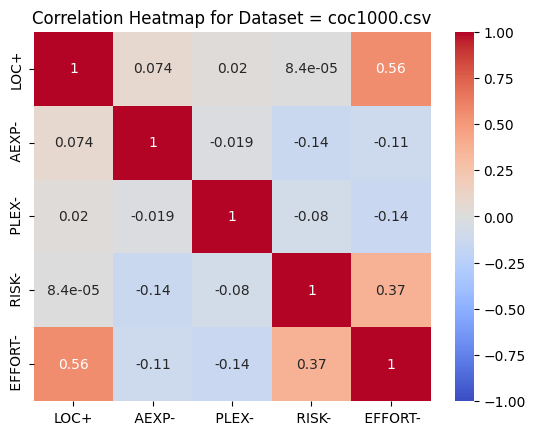

Text(0.5, 1.0, 'Correlation Heatmap for Dataset = pom.csv')

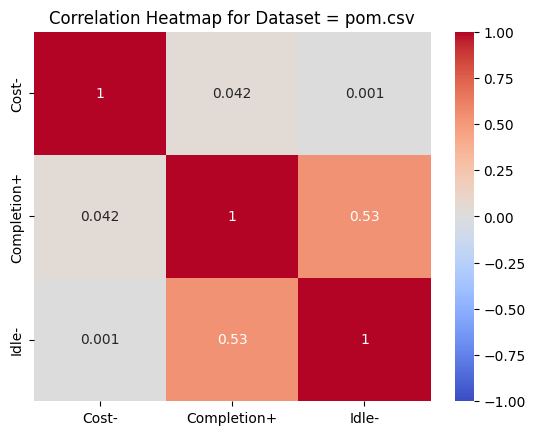

In [6]:
datasets = getAllDatasets()
datasets_correlations = {}
for dataset in datasets:
    df = pd.read_csv(dataset)
    corr_df = df[getOutputColumns(df)].corr()
    datasets_correlations[dataset.name] = corr_df


sns.heatmap(datasets_correlations['coc1000.csv'], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Dataset = coc1000.csv')
plt.show()
sns.heatmap(datasets_correlations['pom.csv'], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Dataset = pom.csv')